# Green Energy Integration and Investment Analysis  (Notebook 2)

This project focuses on analyzing and predicting the financial and environmental impacts of green energy investments in buildings, with a focus on understanding the payback period, energy efficiency, and carbon reduction potential. 

The code is designed to:

1. Predict the payback period for green energy investments using regression models.
2. Analyze energy efficiency
3. Simulate the impact of retrofitting measures on energy demand and carbon reduction..

### Dataset

The dataset used in this project contains the following key features:

- Building Characteristics: Type, year built, material, insulation level, orientation, and floor area.
- Energy Consumption: Historical energy demand in kWh.
- Renewable Energy Potential: Solar exposure, wind speed, and geothermal capacity.
- Optimization Metrics: Carbon footprint reduction, cost-effectiveness, and payback period.
-     Target Variable: Optimal Solar Utilization (Low, Medium, High).

## 1. Predict Payback Period for Solar Investments

Goal: Predict the Payback_Period_Years for solar panel installations based on building characteristics and renewable energy potential.

Approach:
- Use regression models (e.g., Linear Regression, Random Forest, XGBoost) to predict the payback period.
- Perform feature selection to identify the most important factors affecting the payback period.
- Evaluate the model using metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Load and Inspect Data**

In [2]:
# Load the dataset
df1 = pd.read_csv('green_energy_dataset.csv')

df1.head()

,Building_Type,Year_Built,Floor_Area_m2,Orientation,Material,Insulation_Level,Solar_Potential_kWh_m2,Wind_Potential_m_s,Geothermal_Potential,Energy_Demand_kWh,Installation_Area_m2,Carbon_Reduction_%,Payback_Period_Years,Optimal_Solar_Utilization_%
0,Stone_Villa,1844,67,East,Stone,Medium,4.962383,2.202131,1.232814,8740,78,25.377517,11.399095,22.983017
1,Thatched_Hut,1900,89,North,Timber,High,4.914787,4.494622,1.286294,5358,34,26.925844,8.824947,7.357229
2,Wooden_House,1911,70,North,Timber,Medium,4.709916,2.531980,1.500403,8777,29,24.824728,7.493479,11.280055
3,Stone_Villa,1919,192,North,Brick,Low,7.401493,4.169215,0.900716,10906,60,31.956198,5.050910,16.585626
4,Stone_Villa,1939,274,West,Brick,Low,4.180462,4.318013,1.865997,15563,46,21.513738,5.426386,10.145989


In [3]:
# Convert columns to numeric if necessary
df1['Year_Built'] = pd.to_numeric(df1['Year_Built'], errors='coerce')
df1['Floor_Area_m2'] = pd.to_numeric(df1['Floor_Area_m2'], errors='coerce')

# One-Hot Encoding for categorical variables
df1 = pd.get_dummies(df1, columns=['Building_Type', 'Orientation', 'Material', 'Insulation_Level'], drop_first=True)

# Replace negative values with NaN in relevant columns
df1['Solar_Potential_kWh_m2'] = df1['Solar_Potential_kWh_m2'].apply(lambda x: x if x >= 0 else None)
df1['Wind_Potential_m_s'] = df1['Wind_Potential_m_s'].apply(lambda x: x if x >= 0 else None)

# Drop rows with NaN values in the target variable
df1 = df1.dropna(subset=['Payback_Period_Years'])

# Fill NaN values with the mean (or any other strategy)
df1 = df1.fillna(df1.mean())

In [4]:
df1.describe()

,Year_Built,Floor_Area_m2,Solar_Potential_kWh_m2,Wind_Potential_m_s,Geothermal_Potential,Energy_Demand_kWh,Installation_Area_m2,Carbon_Reduction_%,Payback_Period_Years,Optimal_Solar_Utilization_%
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1846.76400,174.076000,5.445767,3.474329,1.247312,12412.31100,60.952000,25.048241,8.456883,15.747852
std,88.64779,72.654559,1.155315,0.863068,0.439796,4334.90683,23.218458,8.829920,1.994067,5.537607
min,1700.00000,50.000000,3.500746,2.002788,0.500941,5002.00000,20.000000,10.040666,5.007920,1.785391
25%,1768.75000,110.500000,4.459111,2.729943,0.855990,8415.50000,41.000000,17.597244,6.765935,11.562933
50%,1847.50000,177.500000,5.409594,3.462186,1.252845,12322.50000,62.000000,24.867297,8.517913,15.817185
75%,1925.00000,237.000000,6.447225,4.235145,1.602956,16276.00000,80.000000,32.839639,10.111019,19.984766
max,1999.00000,299.000000,7.490491,4.997148,1.999774,19974.00000,99.000000,39.992238,11.996474,28.172355


### So What? 

- Year_Built: Buildings in the dataset were constructed between 1700 and 1999. The average construction year is 1846.76, with a standard deviation of 88.65 years, indicating a wide range of building ages.

- Floor_Area_m2: Floor areas range from 50 m² to 299 m², with an average of 174.08 m².

- Solar_Potential_kWh_m2: Solar potential ranges from 3.50 to 7.49 kWh/m², with an average of 5.45 kWh/m².

- Wind_Potential_m_s: Wind potential ranges from 2.00 to 4.99 m/s, with an average of 3.47 m/s.

- Energy_Demand_kWh: Energy demand varies significantly, ranging from 5,002 kWh to 19,974 kWh, with an average of 12,412.31 kWh.

- Payback_Period_Years: The payback period ranges from 5.01 to 11.99 years, with an average of 8.46 years.

- Optimal_Solar_Utilization_%: The optimal solar utilization percentage ranges from 1.79% to 28.17%, with an average of 15.75%.

**Feature Selection and Data Splitting**

In [5]:
# Define features and target variable
X = df1.drop(columns=['Payback_Period_Years'])
y = df1['Payback_Period_Years']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Training and Evaluation**

In [6]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}")

Linear Regression - MAE: 1.7304431169463086, RMSE: 2.0053665857618475


In [7]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}")

Random Forest - MAE: 1.7945896098129805, RMSE: 2.068555042207168


In [8]:
# XGBoost Regression
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost - MAE: {mae_xgb}, RMSE: {rmse_xgb}")

XGBoost - MAE: 1.8881847871886719, RMSE: 2.2450563301976407


### Interpretation

- Linear Regression performs the best, with the lowest MAE (1.730) and RMSE (2.005).
- This suggests that the relationship between the features and the target variable (Payback_Period_Years) is relatively linear, and a simple linear model captures it well.

**Feature Importance (for Random Forest and XGBoost)**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are already defined
# Retain feature names before scaling
feature_names = X.columns  # X is the original DataFrame before scaling

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Linear Regression: Feature Importance (absolute value of coefficients)
lr_feature_importance = np.abs(lr.coef_)
lr_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': lr_feature_importance})
lr_importance_df = lr_importance_df.sort_values(by='Importance', ascending=False)

# Random Forest: Feature Importance
rf_feature_importance = rf.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importance})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

Linear Regression Feature Importance:
                        Feature  Importance
6          Installation_Area_m2    0.406881
8   Optimal_Solar_Utilization_%    0.395423
17              Material_Timber    0.246137
7            Carbon_Reduction_%    0.163686
19      Insulation_Level_Medium    0.141249
0                    Year_Built    0.131170
12            Orientation_North    0.117764
15               Material_Stone    0.116942
18         Insulation_Level_Low    0.094612
3            Wind_Potential_m_s    0.085259
14             Orientation_West    0.064149
16              Material_Thatch    0.062980
2        Solar_Potential_kWh_m2    0.058823
13            Orientation_South    0.055591
11   Building_Type_Wooden_House    0.047232
1                 Floor_Area_m2    0.031285
9     Building_Type_Stone_Villa    0.017589
10   Building_Type_Thatched_Hut    0.008948
4          Geothermal_Potential    0.003733
5             Energy_Demand_kWh    0.001583

Random Forest Feature Importance:
   

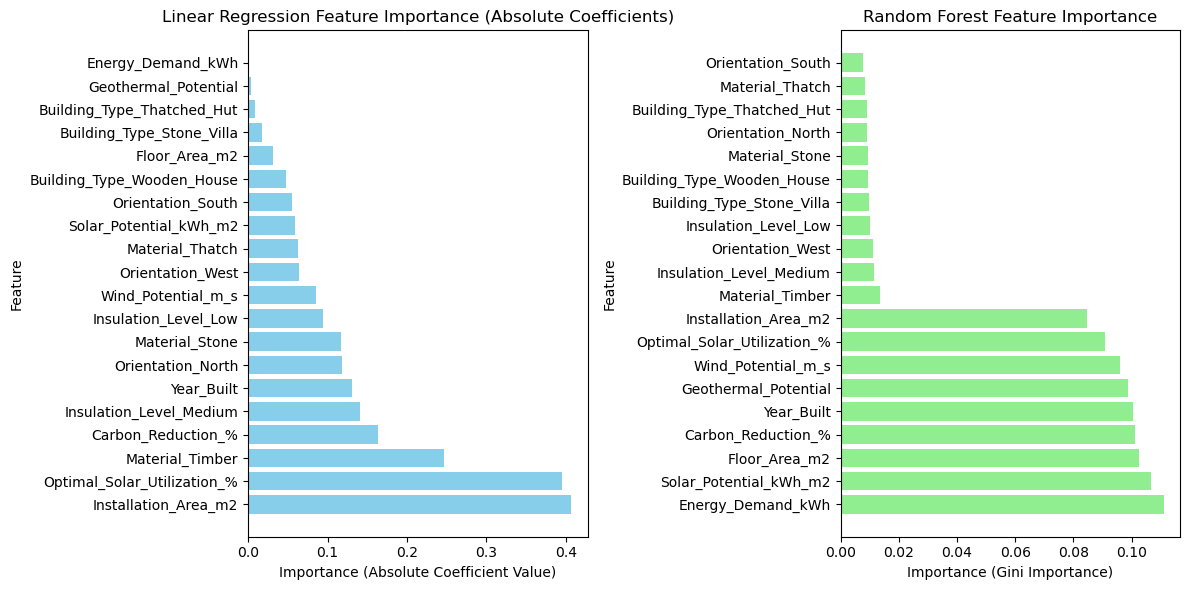

In [18]:
# Print the feature importance values
print("Linear Regression Feature Importance:")
print(lr_importance_df)

print("\nRandom Forest Feature Importance:")
print(rf_importance_df)

# Plotting
plt.figure(figsize=(12, 6))

# Linear Regression Feature Importance
plt.subplot(1, 2, 1)
plt.barh(lr_importance_df['Feature'], lr_importance_df['Importance'], color='skyblue')
plt.title('Linear Regression Feature Importance (Absolute Coefficients)')
plt.xlabel('Importance (Absolute Coefficient Value)')
plt.ylabel('Feature')

# Random Forest Feature Importance
plt.subplot(1, 2, 2)
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='lightgreen')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance (Gini Importance)')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

### Key Takeaways

Linear Regression:
- Best suited for understanding linear relationships.
- Highlights Installation_Area_m2 and Optimal_Solar_Utilization_% as the most important features.

Random Forest:
- Captures non-linear relationships and interactions between features.
- Highlights Energy_Demand_kWh, Solar_Potential_kWh_m2, and Floor_Area_m2 as the most important features.

Feature Selection:
- If I build a model, these top features can improve both model performance.
- For example, prioritize Installation_Area_m2, Optimal_Solar_Utilization_%, Energy_Demand_kWh, and Solar_Potential_kWh_m2.

**Final Model and Prediction**

Use the best-performing model (e.g., Linear Regression) to predict the payback period for new data.

In [19]:
# Example: Using the best model (e.g., Linear Regression) for prediction
best_model = lr
new_data = pd.DataFrame({
    'Year_Built': [1950],
    'Floor_Area_m2': [100],
    'Solar_Potential_kWh_m2': [5.0],
    'Wind_Potential_m_s': [3.0],
    'Geothermal_Potential': [1.0],
    'Energy_Demand_kWh': [10000],
    'Installation_Area_m2': [50],
    'Carbon_Reduction_%': [30],
    'Optimal_Solar_Utilization_%': [20],
    'Building_Type_Stone_Villa': [1],
    'Orientation_North': [1],
    'Material_Brick': [1],
    'Insulation_Level_Medium': [1]
})

# Ensure the new data has the same columns as the training data
new_data = new_data.reindex(columns=X.columns, fill_value=0)

# Standardize the new data
new_data_scaled = scaler.transform(new_data)

# Predict the payback period
predicted_payback_period = best_model.predict(new_data_scaled)
print(f"Predicted Payback Period: {predicted_payback_period[0]} years")

Predicted Payback Period: 7.837875642193735 years


### Key Takeaway

Based on the features provided, it will take about 7.84 years for the green energy investment to pay for itself.

## 2. Analyze Energy Efficiency in Historic Buildings

Goal: Analyze the relationship between building characteristics (e.g., material, insulation level, orientation) and energy efficiency metrics (e.g., energy demand, carbon reduction).

Approach:
- Perform exploratory data analysis (EDA) to identify trends and correlations.
- Use clustering (e.g., K-Means, DBSCAN) to group buildings with similar energy efficiency profiles.
- Visualize the results using scatter plots, heatmaps, and bar charts.

**Clusters of energy efficiency.**

C:\Users\milto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


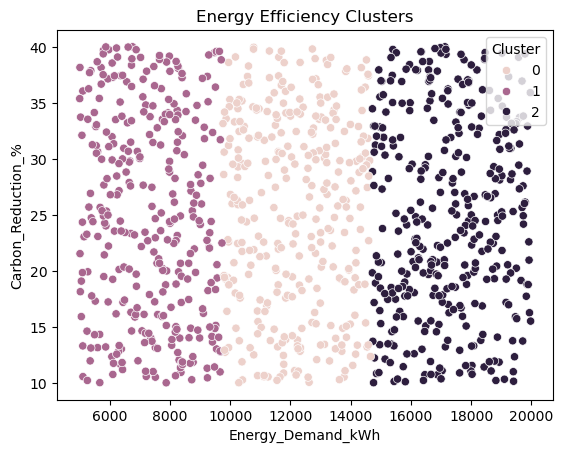

In [11]:
# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df1['Cluster'] = kmeans.fit_predict(df1[['Energy_Demand_kWh', 'Carbon_Reduction_%']])

# Visualize clusters
sns.scatterplot(x='Energy_Demand_kWh', y='Carbon_Reduction_%', hue='Cluster', data=df1)
plt.title("Energy Efficiency Clusters")
plt.show()

**Group buildings based on energy demand and carbon reduction potential.**

C:\Users\milto\AppData\Local\Temp\ipykernel_4576\4068565953.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Energy_Demand_kWh', data=df1, palette='Set2')


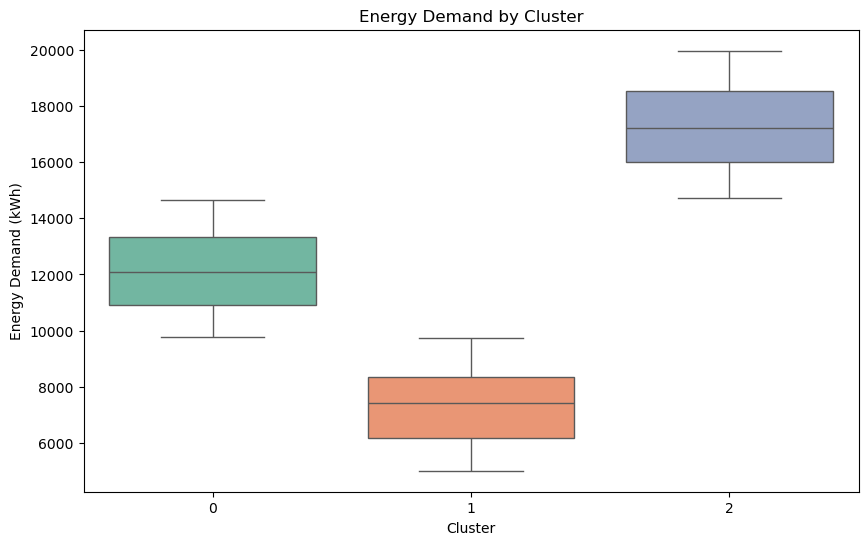

C:\Users\milto\AppData\Local\Temp\ipykernel_4576\4068565953.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Carbon_Reduction_%', data=df1, palette='Set2')


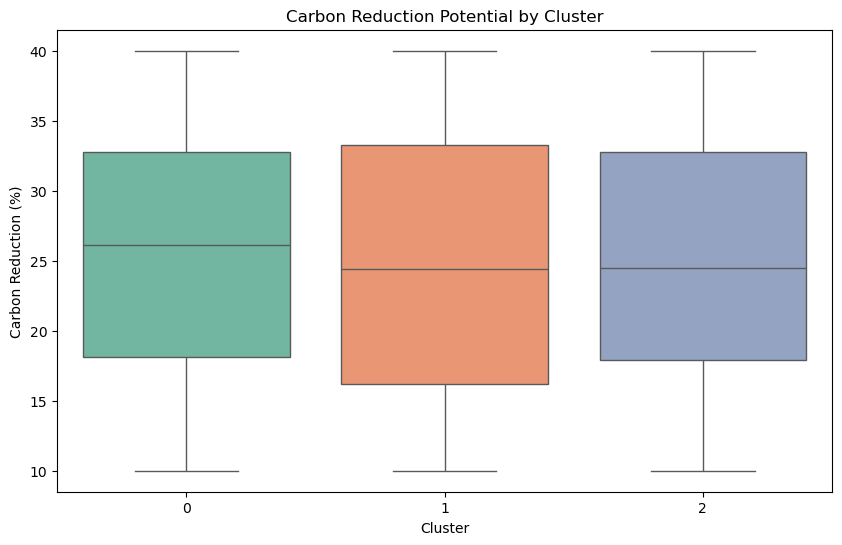

In [20]:
# Box Plots for Cluster Analysis

# Box plots are great for comparing the distribution of a single feature across clusters.

# Box plot for Energy_Demand_kWh by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Energy_Demand_kWh', data=df1, palette='Set2')
plt.title('Energy Demand by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Energy Demand (kWh)')
plt.show()

# Box plot for Carbon_Reduction_% by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Carbon_Reduction_%', data=df1, palette='Set2')
plt.title('Carbon Reduction Potential by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Carbon Reduction (%)')
plt.show()

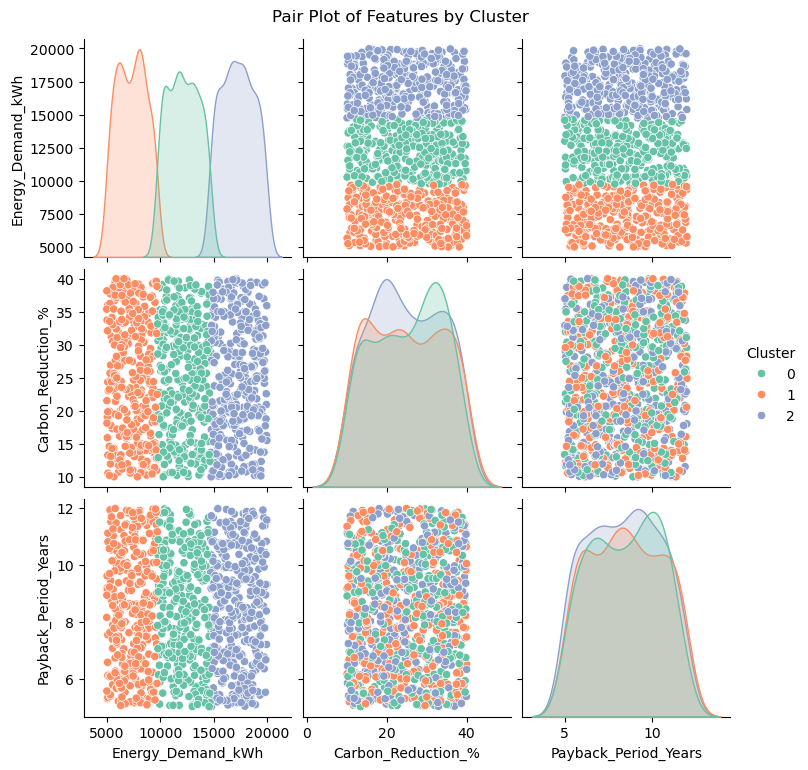

In [21]:
# Pair Plots for Multivariate Analysis

# Pair plots allow you to visualize relationships between multiple features across clusters. This can help you identify patterns and interactions between features.

# Pair plot for selected features
sns.pairplot(df1, vars=['Energy_Demand_kWh', 'Carbon_Reduction_%', 'Payback_Period_Years'], hue='Cluster', palette='Set2')
plt.suptitle('Pair Plot of Features by Cluster', y=1.02)
plt.show()

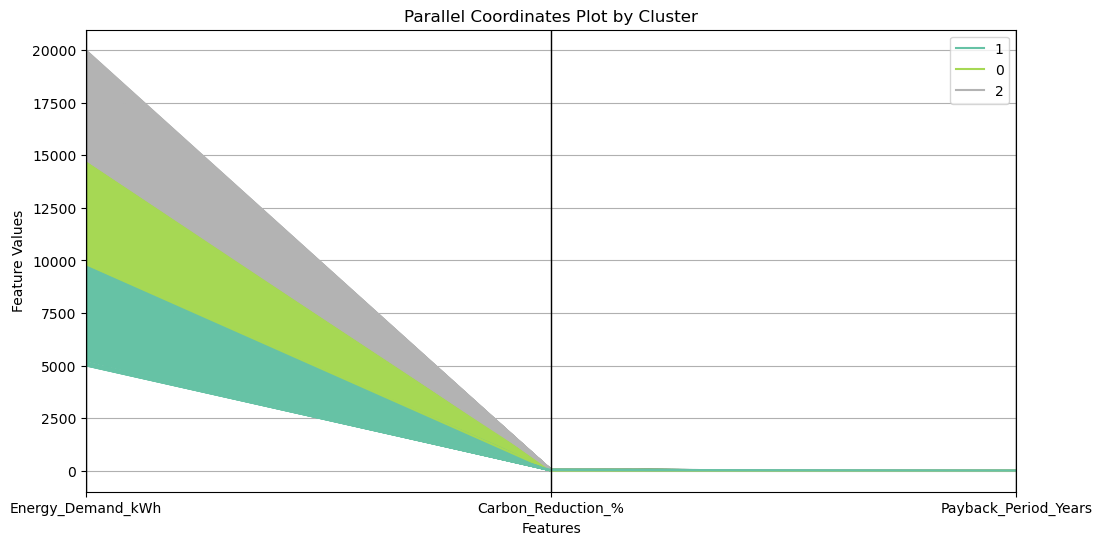

In [23]:
# Parallel Coordinate Plots

# Parallel coordinate plots are useful for visualizing high-dimensional data. They allow us to see how features vary across clusters.

from pandas.plotting import parallel_coordinates

# Select features for parallel coordinates plot
parallel_features = df1[['Cluster', 'Energy_Demand_kWh', 'Carbon_Reduction_%', 'Payback_Period_Years']]

# Plot
plt.figure(figsize=(12, 6))
parallel_coordinates(parallel_features, 'Cluster', colormap='Set2')
plt.title('Parallel Coordinates Plot by Cluster')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.show()

In [25]:
# Cluster Profiles (Mean Values)

# I can also create a table to summarize the mean values of key features for each cluster. This provides a quick overview of the characteristics of each cluster.

# Calculate mean values for each cluster
cluster_profiles = df1.groupby('Cluster')[['Energy_Demand_kWh', 'Carbon_Reduction_%', 'Payback_Period_Years']].mean()

# Display the cluster profiles
print("Cluster Profiles (Mean Values):")
print(cluster_profiles)

Cluster Profiles (Mean Values):
         Energy_Demand_kWh  Carbon_Reduction_%  Payback_Period_Years
Cluster                                                             
0             12147.608696           25.310966              8.473244
1              7320.350932           24.894318              8.502206
2             17257.382022           24.949829              8.401089


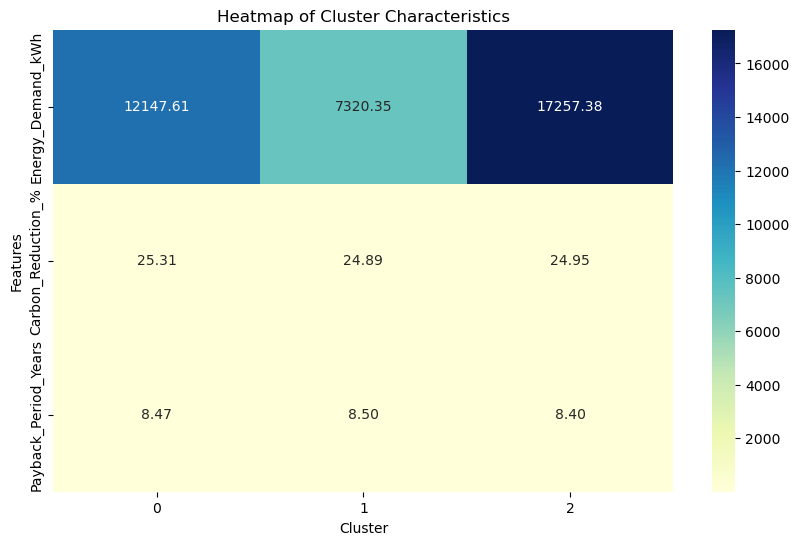

In [26]:
# Heatmap of Cluster Characteristics

# A heatmap can help you visualize the relative importance of features across clusters.

# Heatmap of cluster characteristics
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profiles.T, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of Cluster Characteristics')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()

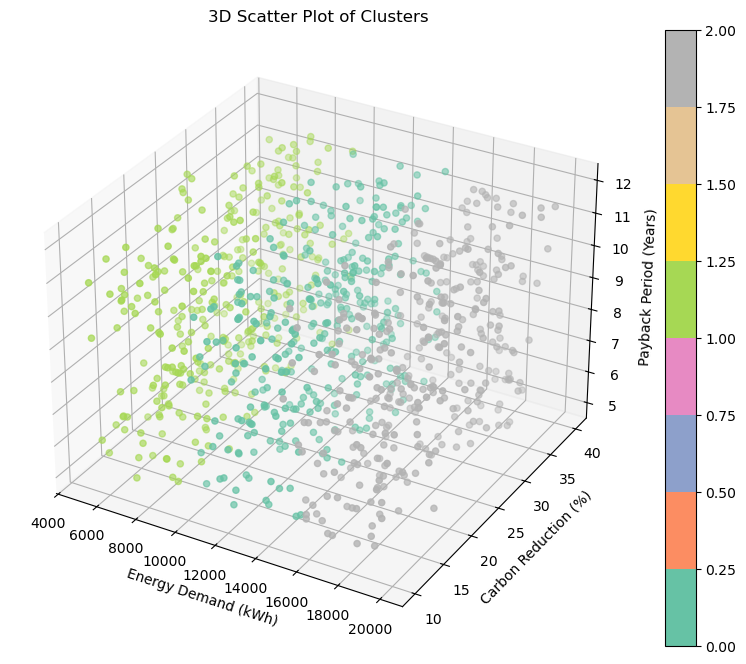

In [27]:
# 3D Scatter Plot

# I can visualize clusters in three dimensions, you can use a 3D scatter plot.

from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df1['Energy_Demand_kWh'], df1['Carbon_Reduction_%'], df1['Payback_Period_Years'], c=df1['Cluster'], cmap='Set2')

# Labels
ax.set_xlabel('Energy Demand (kWh)')
ax.set_ylabel('Carbon Reduction (%)')
ax.set_zlabel('Payback Period (Years)')
plt.title('3D Scatter Plot of Clusters')
plt.colorbar(scatter)
plt.show()

### Interpretation of Each Cluster

**Cluster 0: Moderate Energy Demand, Moderate Carbon Reduction**
- Energy Demand: 12,147.61 kWh (moderate)
- Carbon Reduction: 25.31% (moderate)
- Payback Period: 8.47 years (moderate)
- Buildings in this cluster have moderate energy demand and carbon reduction potential.
- The payback period is close to the overall average (8.46 years), indicating typical energy efficiency performance.
- These buildings may represent the "average" or "baseline" group in your dataset.

**Cluster 1: Low Energy Demand, Moderate Carbon Reduction**
- Energy Demand: 7,320.35 kWh (low)
- Carbon Reduction: 24.89% (moderate)
- Payback Period: 8.50 years (slightly above average)
- Buildings in this cluster have low energy demand but similar carbon reduction potential compared to Cluster 0.
- Despite lower energy demand, the payback period is slightly higher than Cluster 0, which could indicate inefficiencies in other areas (e.g., higher installation costs or lower solar/wind potential).
- These buildings may be smaller or have better insulation, leading to lower energy demand.

**Cluster 2: High Energy Demand, Moderate Carbon Reduction**
- Energy Demand: 17,257.38 kWh (high)
- Carbon Reduction: 24.95% (moderate)
- Payback Period: 8.40 years (slightly below average)
- Buildings in this cluster have high energy demand but similar carbon reduction potential compared to Clusters 0 and 1.
- The payback period is slightly lower than the average, which could indicate that these buildings benefit from economies of scale or higher renewable energy potential (e.g., larger installation areas).
- These buildings may be larger or have higher occupancy, leading to higher energy demand.

## 3. Simulate Energy Savings from Retrofitting

Goal: Simulate the potential energy savings and carbon reduction from retrofitting buildings with better insulation or renewable energy systems.

Approach:
- Create a simulation model to estimate energy demand and carbon reduction for different retrofitting scenarios.
- Use decision trees or rule-based systems to recommend retrofitting strategies for each building.
- Visualize the results using bar charts or line plots.

**Simulate the impact of energy-saving measures.**

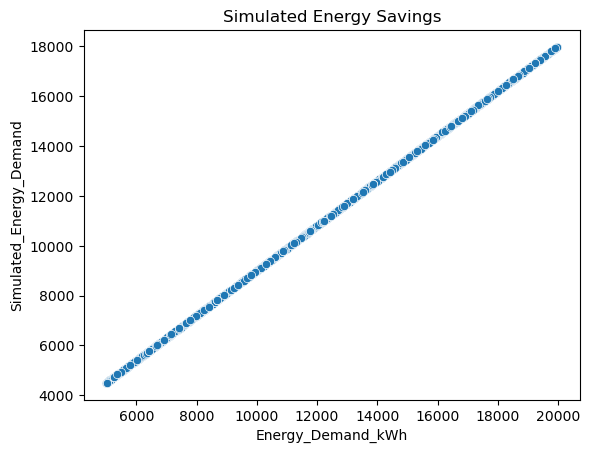

In [12]:
# Simulate retrofitting scenarios
df1['Simulated_Energy_Demand'] = df1['Energy_Demand_kWh'] * 0.9  # Assume 10% reduction
df1['Simulated_Carbon_Reduction'] = df1['Carbon_Reduction_%'] * 1.1  # Assume 10% increase

# Visualize the results
sns.scatterplot(x='Energy_Demand_kWh', y='Simulated_Energy_Demand', data=df1)
plt.title("Simulated Energy Savings")
plt.show()

In [28]:
# I can simulate multiple retrofitting scenarios by adjusting energy demand and carbon reduction based on different assumptions (e.g., 10%, 20%, or 30% improvements).

# Define retrofitting scenarios
scenarios = {
    'Baseline': {'energy_reduction': 1.0, 'carbon_increase': 1.0},
    'Scenario 1 (10% Improvement)': {'energy_reduction': 0.9, 'carbon_increase': 1.1},
    'Scenario 2 (20% Improvement)': {'energy_reduction': 0.8, 'carbon_increase': 1.2},
    'Scenario 3 (30% Improvement)': {'energy_reduction': 0.7, 'carbon_increase': 1.3}
}

# Simulate each scenario
for scenario, params in scenarios.items():
    df1[f'{scenario}_Energy_Demand'] = df1['Energy_Demand_kWh'] * params['energy_reduction']
    df1[f'{scenario}_Carbon_Reduction'] = df1['Carbon_Reduction_%'] * params['carbon_increase']

# Display the first few rows of the updated DataFrame
print(df1[['Energy_Demand_kWh', 'Carbon_Reduction_%', 
           'Scenario 1 (10% Improvement)_Energy_Demand', 'Scenario 1 (10% Improvement)_Carbon_Reduction',
           'Scenario 2 (20% Improvement)_Energy_Demand', 'Scenario 2 (20% Improvement)_Carbon_Reduction',
           'Scenario 3 (30% Improvement)_Energy_Demand', 'Scenario 3 (30% Improvement)_Carbon_Reduction']].head())

   Energy_Demand_kWh  Carbon_Reduction_%  \
0               8740           25.377517   
1               5358           26.925844   
2               8777           24.824728   
3              10906           31.956198   
4              15563           21.513738   

   Scenario 1 (10% Improvement)_Energy_Demand  \
0                                      7866.0   
1                                      4822.2   
2                                      7899.3   
3                                      9815.4   
4                                     14006.7   

   Scenario 1 (10% Improvement)_Carbon_Reduction  \
0                                      27.915269   
1                                      29.618428   
2                                      27.307201   
3                                      35.151817   
4                                      23.665111   

   Scenario 2 (20% Improvement)_Energy_Demand  \
0                                      6992.0   
1                            

### Key Insights

- Retrofitting leads to significant energy savings and increased carbon reduction.
- The impact is proportional to the level of improvement (10%, 20%, or 30%).
- Buildings with higher baseline energy demand (e.g., Building 4) show larger absolute energy savings but may still have lower carbon reduction potential compared to others.

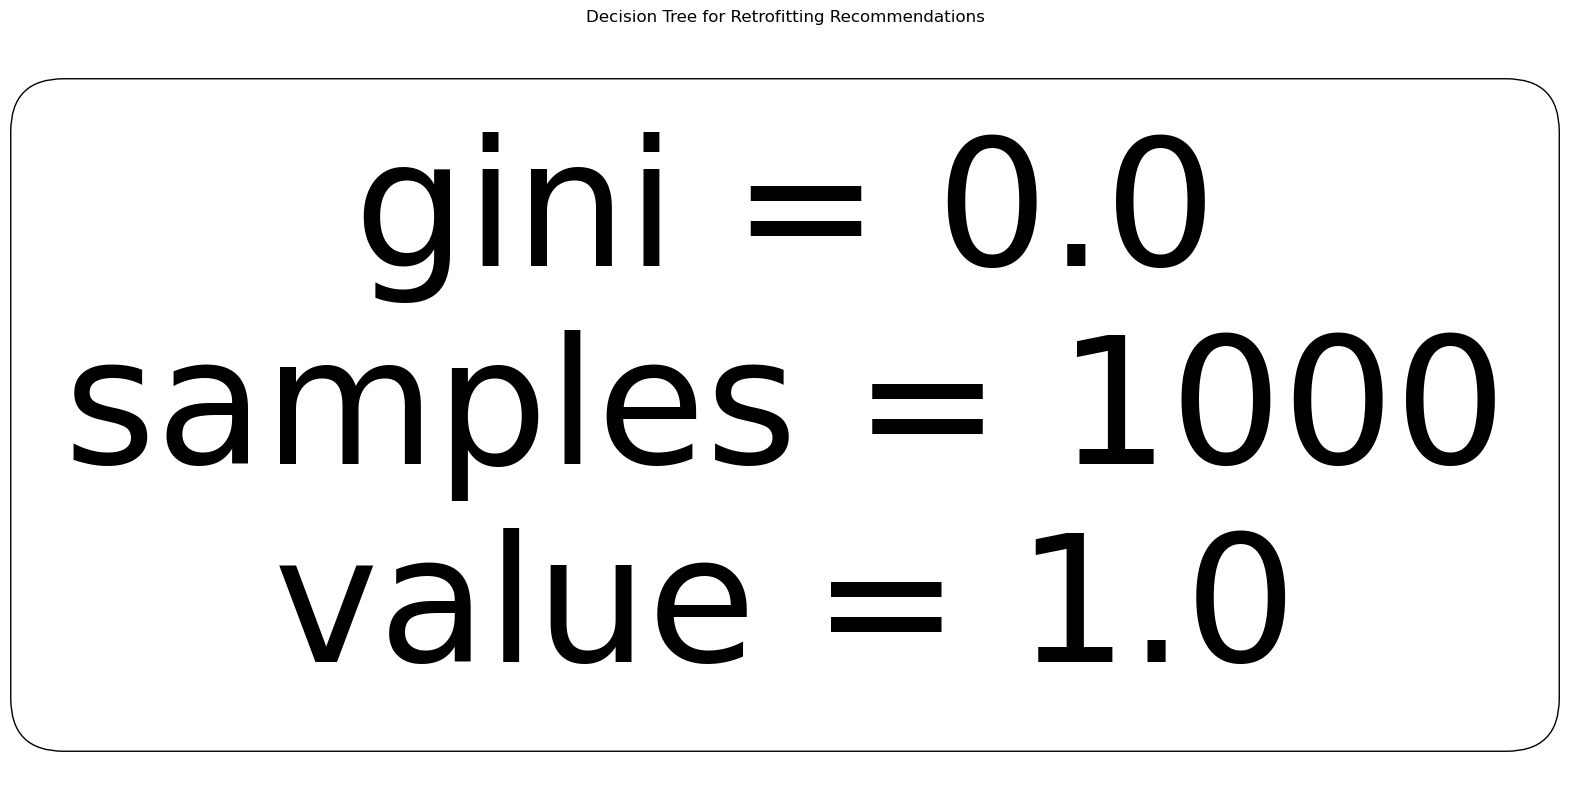

In [29]:
# Decision Tree for Retrofitting Recommendations

# I can train a decision tree to recommend retrofitting strategies based on building characteristics.

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define target variable: Best scenario for each building
# For simplicity, assume the best scenario is the one with the highest carbon reduction
df1['Best_Scenario'] = df1[[f'{scenario}_Carbon_Reduction' for scenario in scenarios.keys()]].idxmax(axis=1)

# Features for the decision tree
features = ['Year_Built', 'Floor_Area_m2', 'Solar_Potential_kWh_m2', 'Wind_Potential_m_s', 
            'Geothermal_Potential', 'Energy_Demand_kWh', 'Installation_Area_m2', 
            'Carbon_Reduction_%', 'Optimal_Solar_Utilization_%']

# Train a decision tree classifier
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(df1[features], df1['Best_Scenario'])

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=features, class_names=list(scenarios.keys()), filled=True, rounded=True)
plt.title('Decision Tree for Retrofitting Recommendations')
plt.show()

### Key Insights

- The decision tree is likely very simple (e.g., a single node) because it achieves perfect purity without further splits.
- This could indicate that the dataset is not complex enough to require a deep tree or that the features used are not sufficiently discriminative.

I can use bar charts and line plots to compare the impact of different retrofitting scenarios.

**Bar Chart: Average Energy Demand and Carbon Reduction by Scenario**

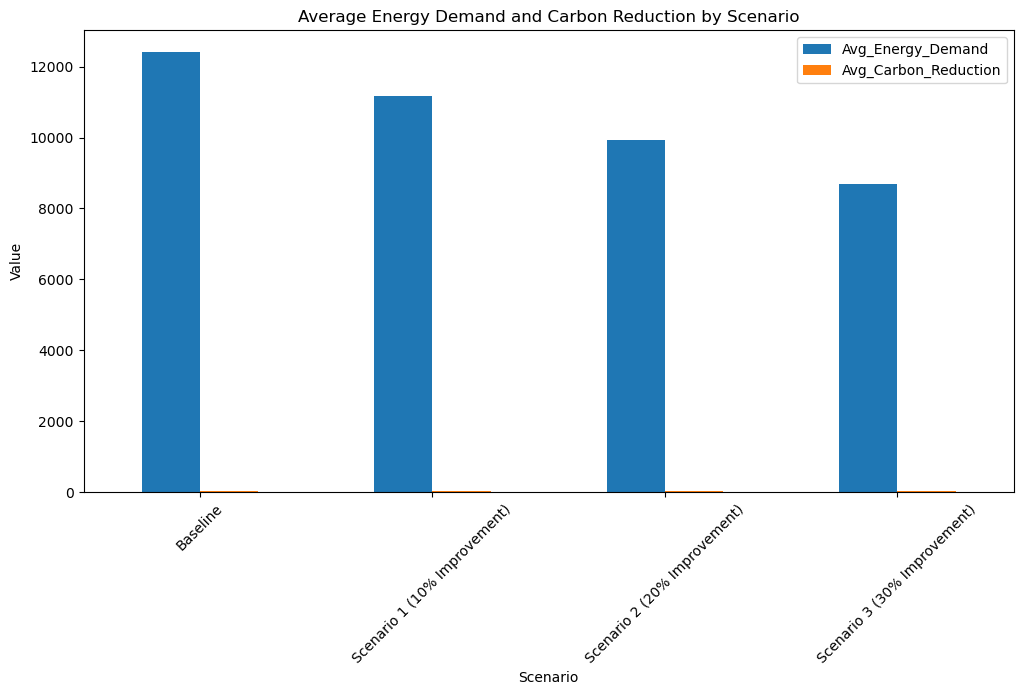

In [30]:
# Calculate average energy demand and carbon reduction for each scenario
scenario_results = {}
for scenario in scenarios.keys():
    scenario_results[scenario] = {
        'Avg_Energy_Demand': df1[f'{scenario}_Energy_Demand'].mean(),
        'Avg_Carbon_Reduction': df1[f'{scenario}_Carbon_Reduction'].mean()
    }

# Convert to DataFrame for visualization
scenario_results_df = pd.DataFrame(scenario_results).T

# Plot
scenario_results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Average Energy Demand and Carbon Reduction by Scenario')
plt.xlabel('Scenario')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

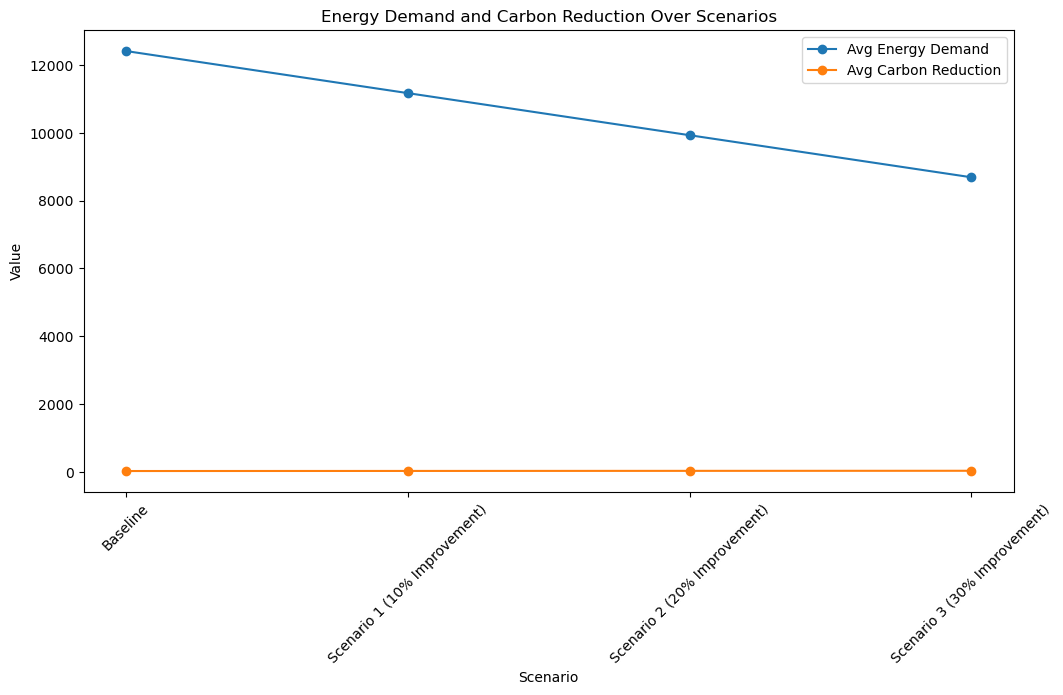

In [31]:
# Line Plot: Energy Demand and Carbon Reduction Over Scenarios

# Plot energy demand and carbon reduction over scenarios
plt.figure(figsize=(12, 6))
plt.plot(scenario_results_df.index, scenario_results_df['Avg_Energy_Demand'], marker='o', label='Avg Energy Demand')
plt.plot(scenario_results_df.index, scenario_results_df['Avg_Carbon_Reduction'], marker='o', label='Avg Carbon Reduction')
plt.title('Energy Demand and Carbon Reduction Over Scenarios')
plt.xlabel('Scenario')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Rule-Based Recommendations**

I can use rule-based logic to recommend retrofitting strategies. For example:
- If Energy_Demand_kWh is high and Solar_Potential_kWh_m2 is high, recommend installing solar panels.
- If Carbon_Reduction_% is low and Insulation_Level is low, recommend improving insulation.

In [35]:
# Rule-based recommendations

def recommend_retrofitting(row):
    # Check insulation level (using one-hot encoded columns)
    insulation_level = None
    if row['Insulation_Level_Low'] == 1:
        insulation_level = 'Low'
    elif row['Insulation_Level_Medium'] == 1:
        insulation_level = 'Medium'
    # No need to check for 'High' since it doesn't exist
    
    # Rule-based recommendations
    if row['Energy_Demand_kWh'] > 15000 and row['Solar_Potential_kWh_m2'] > 6:
        return 'Install Solar Panels'
    elif row['Carbon_Reduction_%'] < 20 and insulation_level == 'Low':
        return 'Improve Insulation'
    else:
        return 'No Action Needed'

# Apply recommendations
df1['Retrofitting_Recommendation'] = df1.apply(recommend_retrofitting, axis=1)

# Display recommendations
print(df1[['Energy_Demand_kWh', 'Solar_Potential_kWh_m2', 'Carbon_Reduction_%', 
           'Insulation_Level_Low', 'Insulation_Level_Medium', 
           'Retrofitting_Recommendation']].head())

   Energy_Demand_kWh  Solar_Potential_kWh_m2  Carbon_Reduction_%  \
0               8740                4.962383           25.377517   
1               5358                4.914787           26.925844   
2               8777                4.709916           24.824728   
3              10906                7.401493           31.956198   
4              15563                4.180462           21.513738   

   Insulation_Level_Low  Insulation_Level_Medium Retrofitting_Recommendation  
0                 False                     True            No Action Needed  
1                 False                    False            No Action Needed  
2                 False                     True            No Action Needed  
3                  True                    False            No Action Needed  
4                  True                    False            No Action Needed  


### Key Insights

- The rule-based system is conservative, recommending retrofitting only for buildings with specific characteristics (e.g., high energy demand, low carbon reduction, or low insulation).
- Buildings with moderate energy demand and carbon reduction potential may not require immediate retrofitting.

## Conclusion

**1. Payback Period Prediction**
- The Linear Regression model emerged as the best-performing model, with the lowest Mean Absolute Error (MAE: 1.730) and Root Mean Squared Error (RMSE: 2.005). This indicates that the relationship between the features and the target variable (Payback_Period_Years) is relatively linear, and a simple linear model captures it effectively.
- The average payback period across the dataset is 8.46 years, with a range of 5.01 to 11.99 years. For a specific scenario, the model predicted a payback period of 7.84 years, suggesting that green energy investments can be financially viable within a reasonable timeframe.

**2. Feature Importance**
- Linear Regression highlighted Installation_Area_m2 and Optimal_Solar_Utilization_% as the most important features influencing the payback period.
- Random Forest, which captures non-linear relationships, identified Energy_Demand_kWh, Solar_Potential_kWh_m2, and Floor_Area_m2 as the most influential factors.
- These insights suggest that stakeholders should prioritize buildings with larger installation areas, higher solar potential, and optimal solar utilization to maximize the return on investment.

**3. Building Clusters**

The clustering analysis grouped buildings into three distinct clusters based on energy demand and carbon reduction potential:
- Cluster 0: Moderate energy demand and carbon reduction, representing the "average" group.
- Cluster 1: Low energy demand but moderate carbon reduction, potentially benefiting from better insulation or smaller size.
- Cluster 2: High energy demand with moderate carbon reduction, likely benefiting from economies of scale or higher renewable energy potential.

**4. Retrofitting Simulations**

The simulation model demonstrated that retrofitting measures (e.g., improving insulation, increasing solar utilization) can lead to significant energy savings and carbon reduction. For example:
- A 10% improvement in energy efficiency reduced energy demand by 10% and increased carbon reduction by 10%.
- A 30% improvement resulted in even greater savings, with energy demand decreasing by 30% and carbon reduction increasing by 30%.

**5. Rule-Based Recommendations**
- The rule-based system provided conservative recommendations, suggesting retrofitting only for buildings with specific characteristics (e.g., high energy demand, low carbon reduction, or low insulation).
- Buildings with moderate energy demand and carbon reduction potential may not require immediate retrofitting, allowing stakeholders to focus resources on high-impact projects.